In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [173]:
from causalitydemos.datasets.aspirin import LognormalAspirinModel

# Specify the aspirin model

In [231]:
aspirin_model = LognormalAspirinModel(1.5, 2.68, 1.0, severity_mean=np.log(52), severity_sigma=0.15,
                                      dosage_sigma=0.07, duration_sigma=0.05)

## Generate examples from observational setting

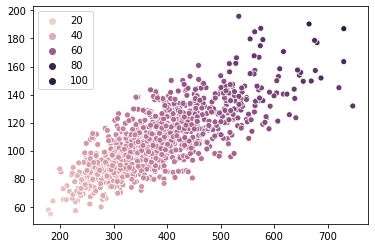

In [236]:
z, t, y = aspirin_model.generate_examples(5000)
sns.scatterplot(t, y, hue=z)

### 3D plot of samples

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


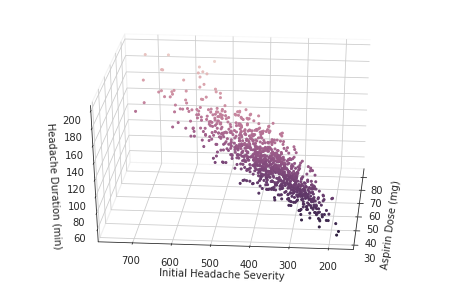

In [237]:
with sns.axes_style('ticks'):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(z, t, y, s=4,cmap=sns.cubehelix_palette(5, as_cmap=True), c=-y,  depthshade=False)
    ax.view_init(30, 185)
#     ax.view_init(45, 185)

    ax.set_xlabel('Aspirin Dose (mg)')
    ax.set_ylabel('Initial Headache Severity')
    ax.set_zlabel('Headache Duration (min)', rotation=0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
plt.savefig('../plots/3d_aspirin_samples.eps', bbox_inches='tight',dpi=200)

### Samples colour-coded

###### Same as grouping

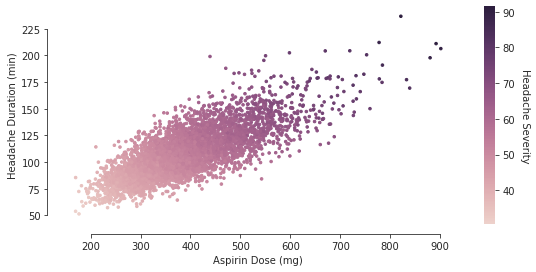

In [177]:
# color_palette = sns.color_palette('Set2', num_groups)
colors = np.zeros([len(z), 3])

with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(9, 4))

    sc = plt.scatter(t, y, c=z, cmap=sns.cubehelix_palette(5, as_cmap=True), s=6.5)
    sns.despine(offset=10, trim=True)
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Headache Severity', rotation=270)
    cbar.outline.set_visible(False)


#     ax.set_xlim(100, None)
#     ax.set_ylim(4, None)
    ax.set_xlabel('Aspirin Dose (mg)')
    ax.set_ylabel('Headache Duration (min)')
plt.savefig('../plots/aspirin_model_samples_colormap.eps', bbox_inches='tight',dpi=200)

###### Natural Ordering

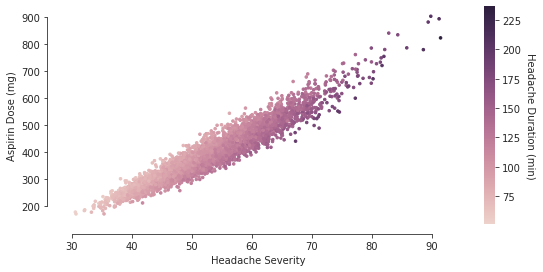

In [178]:
# color_palette = sns.color_palette('Set2', num_groups)
colors = np.zeros([len(z), 3])

with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(9, 4))

    sc = plt.scatter(z, t, c=y, cmap=sns.cubehelix_palette(5, as_cmap=True), s=6.5)
    sns.despine(offset=10, trim=True)
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Headache Duration (min)', rotation=270)
    cbar.outline.set_visible(False)

#     ax.set_xlim(100, None)
#     ax.set_ylim(4, None)
    ax.set_xlabel('Headache Severity')
    ax.set_ylabel('Aspirin Dose (mg)')


###### Pairplot

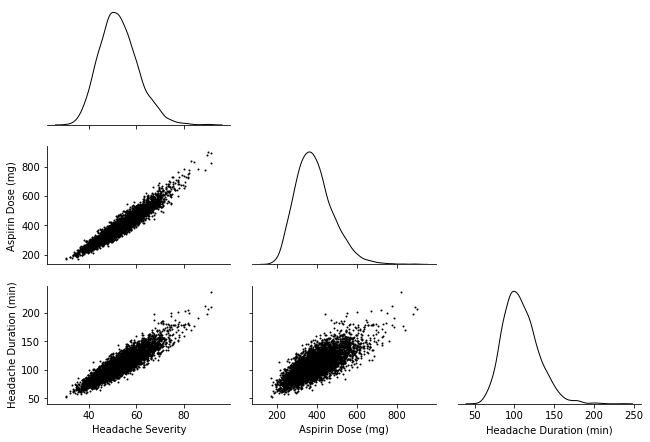

In [186]:
df = pd.DataFrame({'Headache Severity': z, 'Aspirin Dose (mg)': t, 'Headache Duration (min)':y})
# g = sns.PairGrid(df)
# g = g.map_diag(sns.kdeplot)
# g = g.map_offdiag(plt.scatter, s=40)
sns.pairplot(df, diag_kind='kde', corner=True, aspect=1.5, height=2, plot_kws=dict(s=4, alpha=1.0, linewidth=0, color='black'), diag_kws=dict(shade=False, color='black', lw=1))

plt.savefig('../plots/aspirin_model_samples_pairgrid.eps', bbox_inches='tight',dpi=200)


## Counterfactual Plots

###### 3D scatter for different T*

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


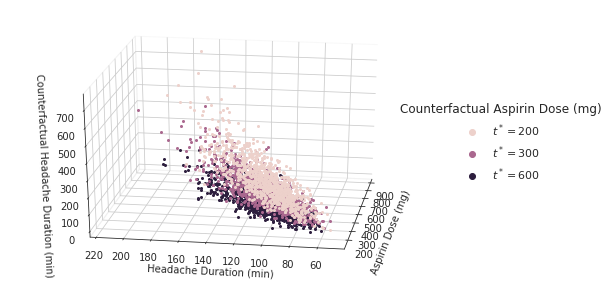

In [228]:
t_cf_list = [200, 300, 600]
colors = sns.cubehelix_palette(len(t_cf_list))

with sns.axes_style('ticks'):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    for i, t_cf in enumerate(t_cf_list):
        z, t, y = aspirin_model.generate_examples(1000)
        y_cf = aspirin_model._sample_y_cond_on_zt(z, np.ones_like(z)*t_cf)


        ax.scatter(t, y, y_cf, color=colors[i], s=4, depthshade=False, label=f'$t^*={t_cf}$')
    ax.view_init(25, 189)

    ax.set_xlabel('Aspirin Dose (mg)')
    ax.set_ylabel('Headache Duration (min)')
    ax.set_zlabel('Counterfactual Headache Duration (min)', rotation=0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    plt.legend(bbox_to_anchor=(0.87,0.5), loc="center left", borderaxespad=0, frameon=False,
               title='Counterfactual Aspirin Dose (mg)', markerscale=3, fontsize=11, title_fontsize=12)


plt.savefig('../plots/3d_aspirin_cf_samples.eps', bbox_inches='tight',dpi=200)

###### Plot of expectation

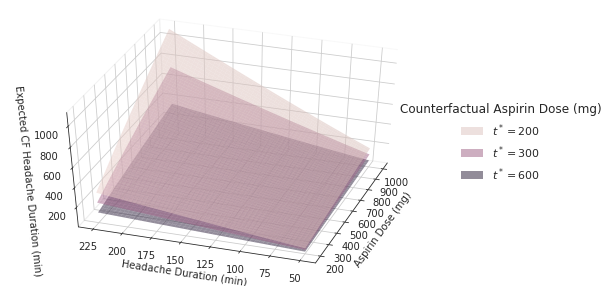

In [222]:
t_cf_list = [200, 300, 600]
y_grid = np.linspace(50, 225, 100)
t_grid = np.linspace(200, 1000, 100)
tt, yy = np.meshgrid(t_grid, y_grid, sparse=False)
colors = sns.cubehelix_palette(len(t_cf_list))

    
with sns.axes_style('ticks'):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    for i, t_cf in enumerate(t_cf_list):
        y_cf = np.zeros_like(tt)
        for j, k in itertools.product(range(len(t_grid)), range(len(y_grid))):
            y_cf[j, k] = aspirin_model.calc_exp_y_cf_given_ty(t_grid[j], y_grid[k], t_cf)

        surf = ax.plot_surface(tt, yy, y_cf, edgecolor='none', alpha=0.5, label=f'$t^*={t_cf}$', color=colors[i])
        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d
    ax.view_init(42, 199)

    ax.set_xlabel('Aspirin Dose (mg)')
    ax.set_ylabel('Headache Duration (min)')
    ax.set_zlabel('Expected CF Headache Duration (min)', rotation=0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    plt.legend(bbox_to_anchor=(0.87,0.5), loc="center left", borderaxespad=0, frameon=False,
               title='Counterfactual Aspirin Dose (mg)',  fontsize=11, title_fontsize=12)
plt.savefig('../plots/3d_aspirin_cf_expected_surface.png', bbox_inches='tight',dpi=400)

###### 

## Group Z into different colours plot

In [6]:
def plot_aspirin_samples_by_severity(group_by_colour=True, num_groups=7, plot_group_label=True):
    z_quantiles = [np.quantile(z, perc) for perc in np.linspace(0, 1.0, num_groups + 1)]
    z_quantiles = np.round(z_quantiles, 0)
    z_quantiles[0] = 0  # Make sure initial elem. included
    color_palette = sns.color_palette('Set2', num_groups)
    darker_palette = list(map(lambda color: np.clip(np.array(color)*0.85, a_min=0, a_max=1), color_palette))
    colors = np.zeros([len(z), 3])
    
    if group_by_colour:
        for i in range(num_groups):
            quantile_idxs = np.logical_and(z > z_quantiles[i], z <= z_quantiles[i+1])
            colors[quantile_idxs] = color_palette[i]
    else:
        colors[:, :] = 0.3
    
    with sns.axes_style('ticks'):
        fig, ax = plt.subplots(figsize=(8, 4))
        
        plt.scatter(t, y, color=colors, s=6.5)
        ax.set_xlim(100, None)
        ax.set_ylim(4, None)
        if plot_group_label:
            for i in range(num_groups):
                quantile_idxs = np.logical_and(z > z_quantiles[i], z <= z_quantiles[i+1])
                # Add label annotating each group
                t_quant, y_quant = t[quantile_idxs], y[quantile_idxs]
                label_point_idxs = np.argsort(t_quant / t.max() - 7*y_quant / y.max())[-12:]
                label_point_t, label_point_y = np.mean(t_quant[label_point_idxs]), np.mean(y_quant[label_point_idxs])
                label_point_t += t.max()*0.042
                label_point_y -= y.max()*0.03
                group_label = f'${int(z_quantiles[i])} < Z \leq {int(z_quantiles[i + 1])}$'
                ax.text(label_point_t, label_point_y, group_label, rotation=-38,
                        horizontalalignment='left',verticalalignment='top', 
                        fontdict={'weight':'100', 'stretch': 'condensed', 'size': 13}, color=darker_palette[i])
        sns.despine(offset=10, trim=True)

        ax.set_xlabel('Aspirin Dose (mg)')
        ax.set_ylabel('Headache Duration (min)')
    return fig, ax

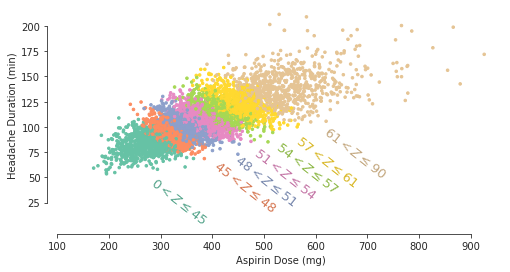

In [44]:
fig, ax = plot_aspirin_samples_by_severity(group_by_colour=True)
plt.savefig('../plots/simpson_paradox.svg', bbox_inches='tight')
plt.savefig('../plots/simpson_paradox.eps', bbox_inches='tight')

# plt.savefig('../plots/simpson_paradox.png', bbox_inches='tight',dpi=200)

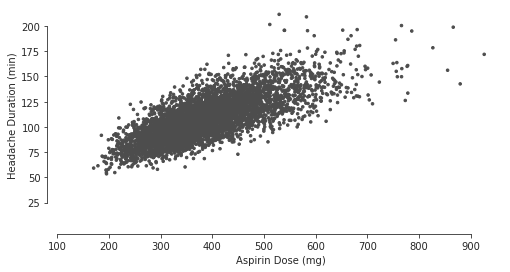

In [49]:
fig, ax = plot_aspirin_samples_by_severity(group_by_colour=False, plot_group_label=False)
plt.savefig('../plots/simpson_paradox_gray.svg', bbox_inches='tight')
plt.savefig('../plots/simpson_paradox_gray.eps', bbox_inches='tight')

# Intervention plot

In [62]:
intervention_doses = np.linspace(50, 800, 6)
num_examples = 5000
# Generate interventional examples
ts_list, ys_list =[], []
for dose in intervention_doses:
    zs, ts, ys = aspirin_model.sample_interventional(dose, num_examples)
    ts_list.append(ts)
    ys_list.append(ys)
intervention_df = pd.DataFrame({'dose': np.concatenate(ts_list), 'duration': np.concatenate(ys_list)})

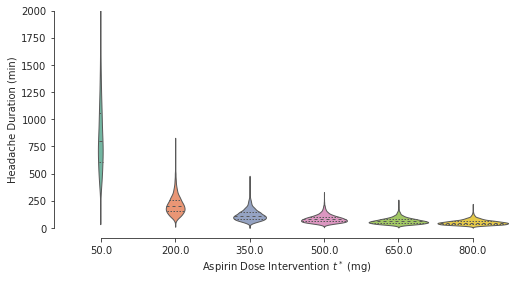

In [74]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.violinplot(x="dose", y="duration", data=intervention_df, ax=ax,
                   palette=sns.color_palette('Set2'), scale='area', width=0.95, linewidth=1.0, inner='quartile')
    ax.set_ylim(0, 2000)
    sns.despine(offset=10, trim=True)
    ax.set_xlabel('Aspirin Dose Intervention $t^*$ (mg)')
    ax.set_ylabel('Headache Duration (min)')
plt.savefig('../plots/aspirin-example-intervention.eps', bbox_inches='tight')